In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn import svm
from sklearn import preprocessing, linear_model, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, r2_score
import timeit

In [ ]:
# load data stroke
url = 'https://raw.githubusercontent.com/nyomanyoga/Datasets_Damin/master/Stroke.csv'
data = pd.read_csv(url)
data = data.iloc[:1000]
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
995,Male,1.40,0,0,No,children,Urban,90.51,18.9,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
997,Male,55.00,0,0,Yes,Private,Rural,56.42,31.8,never smoked,0
998,Female,29.00,0,0,No,Private,Urban,73.67,21.0,Unknown,0


In [ ]:
#cleaning Data
# Mengecek kolom yang terdapat data kosong
data.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  58
smoking_status        0
stroke                0
dtype: int64

In [ ]:
# Mengganti nilai kosong (N/A) dengan nilai rata-rata kolom
avg = data['bmi'].mean()
data['bmi'] = data['bmi'].fillna(avg)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,29.623673,never smoked,1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
995,Male,1.40,0,0,No,children,Urban,90.51,18.900000,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.300000,Unknown,0
997,Male,55.00,0,0,Yes,Private,Rural,56.42,31.800000,never smoked,0
998,Female,29.00,0,0,No,Private,Urban,73.67,21.000000,Unknown,0


In [ ]:
# Normalisasi Data

from sklearn.preprocessing import LabelEncoder

temp=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for i in range (len(temp)):
  labelencoder_y = LabelEncoder()
  data[temp[i]] = labelencoder_y.fit_transform(data[temp[i]])

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.00,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.00,0,0,1,3,0,202.21,29.623673,2,1
2,1,80.00,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.00,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.00,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,1.40,0,0,0,4,1,90.51,18.900000,0,0
996,1,0.24,0,0,0,4,0,118.87,16.300000,0,0
997,1,55.00,0,0,1,2,0,56.42,31.800000,2,0
998,0,29.00,0,0,0,2,1,73.67,21.000000,0,0


In [ ]:
# Mengecek korelasi keterhubungan data

data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.018439,-0.011157,0.111509,-0.005698,0.005608,0.001498,0.099276,-0.032857,-0.057649,0.030152
age,0.018439,1.000000,0.286122,0.291412,0.604906,-0.291219,0.072881,0.271538,0.227346,0.195605,0.494177
hypertension,-0.011157,0.286122,1.000000,0.089960,0.132761,-0.015140,-0.009029,0.188011,0.154297,0.128945,0.226350
heart_disease,0.111509,0.291412,0.089960,1.000000,0.101438,-0.024979,0.045274,0.212584,0.027511,0.075602,0.227414
ever_married,-0.005698,0.604906,0.132761,0.101438,1.000000,-0.287034,0.024940,0.183404,0.264595,0.229586,0.221254
work_type,0.005608,-0.291219,-0.015140,-0.024979,-0.287034,1.000000,-0.003900,-0.043507,-0.214075,-0.273885,-0.062530
Residence_type,0.001498,0.072881,-0.009029,0.045274,0.024940,-0.003900,1.000000,0.006579,0.052951,0.000383,0.043957
avg_glucose_level,0.099276,0.271538,0.188011,0.212584,0.183404,-0.043507,0.006579,1.000000,0.183409,0.047284,0.236228
bmi,-0.032857,0.227346,0.154297,0.027511,0.264595,-0.214075,0.052951,0.183409,1.000000,0.193453,0.052998
smoking_status,-0.057649,0.195605,0.128945,0.075602,0.229586,-0.273885,0.000383,0.047284,0.193453,1.000000,0.033091


In [ ]:
data = data[['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'stroke']]
data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,67.00,0,1,1,228.69,36.600000,1
1,61.00,0,0,1,202.21,29.623673,1
2,80.00,0,1,1,105.92,32.500000,1
3,49.00,0,0,1,171.23,34.400000,1
4,79.00,1,0,1,174.12,24.000000,1
...,...,...,...,...,...,...,...
995,1.40,0,0,0,90.51,18.900000,0
996,0.24,0,0,0,118.87,16.300000,0
997,55.00,0,0,1,56.42,31.800000,0
998,29.00,0,0,0,73.67,21.000000,0


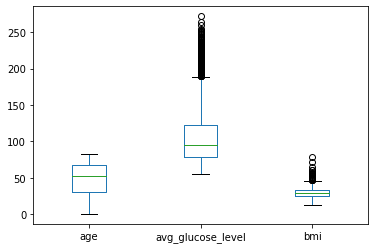

In [ ]:
data[['age','avg_glucose_level','bmi']].plot(kind='box')

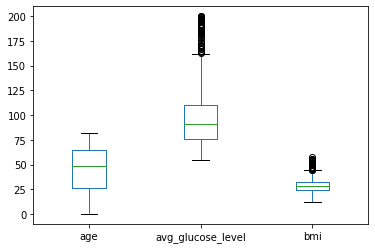

In [ ]:
data=data[(data['avg_glucose_level']<200) & (data['bmi']<60)]
data[['age','avg_glucose_level','bmi']].plot(kind='box')

In [ ]:
data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
2,80.00,0,1,1,105.92,32.5,1
3,49.00,0,0,1,171.23,34.4,1
4,79.00,1,0,1,174.12,24.0,1
5,81.00,0,0,1,186.21,29.0,1
6,74.00,1,1,1,70.09,27.4,1
...,...,...,...,...,...,...,...
995,1.40,0,0,0,90.51,18.9,0
996,0.24,0,0,0,118.87,16.3,0
997,55.00,0,0,1,56.42,31.8,0
998,29.00,0,0,0,73.67,21.0,0


Split Data 70:30

In [ ]:
x = data.drop(columns=['stroke'])
y = data['stroke']

# Membagi data train dengan data test (70 : 30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[197  14]
 [ 30  25]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       211
           1       0.64      0.45      0.53        55

    accuracy                           0.83       266
   macro avg       0.75      0.69      0.72       266
weighted avg       0.82      0.83      0.82       266



Split Data 80 : 20

In [ ]:
x2 = data.drop(columns=['stroke'])
y2 = data['stroke']

# Membagi data train dengan data test (80 : 20)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2)

SVM Classification

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(x_train2, y_train2)

#Predict the response for test dataset
y_pred = clf.predict(x_test2)

In [ ]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test2, y_pred))

print(classification_report(y_test2, y_pred))

[[140   1]
 [ 27   9]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       141
           1       0.90      0.25      0.39        36

    accuracy                           0.84       177
   macro avg       0.87      0.62      0.65       177
weighted avg       0.85      0.84      0.80       177



Split Data 90:10

In [ ]:
# 90:10
x3 = data.drop(columns=['stroke'])
y3 = data['stroke']

# Membagi data train dengan data test (90 : 10
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.1)

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(x_train3, y_train3)

#Predict the response for test dataset
y_pred = clf.predict(x_test3)

In [ ]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test3, y_pred))

print(classification_report(y_test3, y_pred))

[[66  4]
 [15  4]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        70
           1       0.50      0.21      0.30        19

    accuracy                           0.79        89
   macro avg       0.66      0.58      0.59        89
weighted avg       0.75      0.79      0.75        89

